In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [285]:
df = pd.read_csv('D:/DataHub/Life_Expectancy_Data.csv')

df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [286]:
# info of dataframe
df.info()

# shape of dataframe
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(2938, 22)

In [287]:
#checking null values
missing_values = df.isnull().sum()

missing_values[missing_values > 0]



Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [288]:
missing_percentage = (missing_values / len(df)) * 100

missing_percentage

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [289]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [290]:
#checking for Duplicates Values
df.duplicated().sum()

0

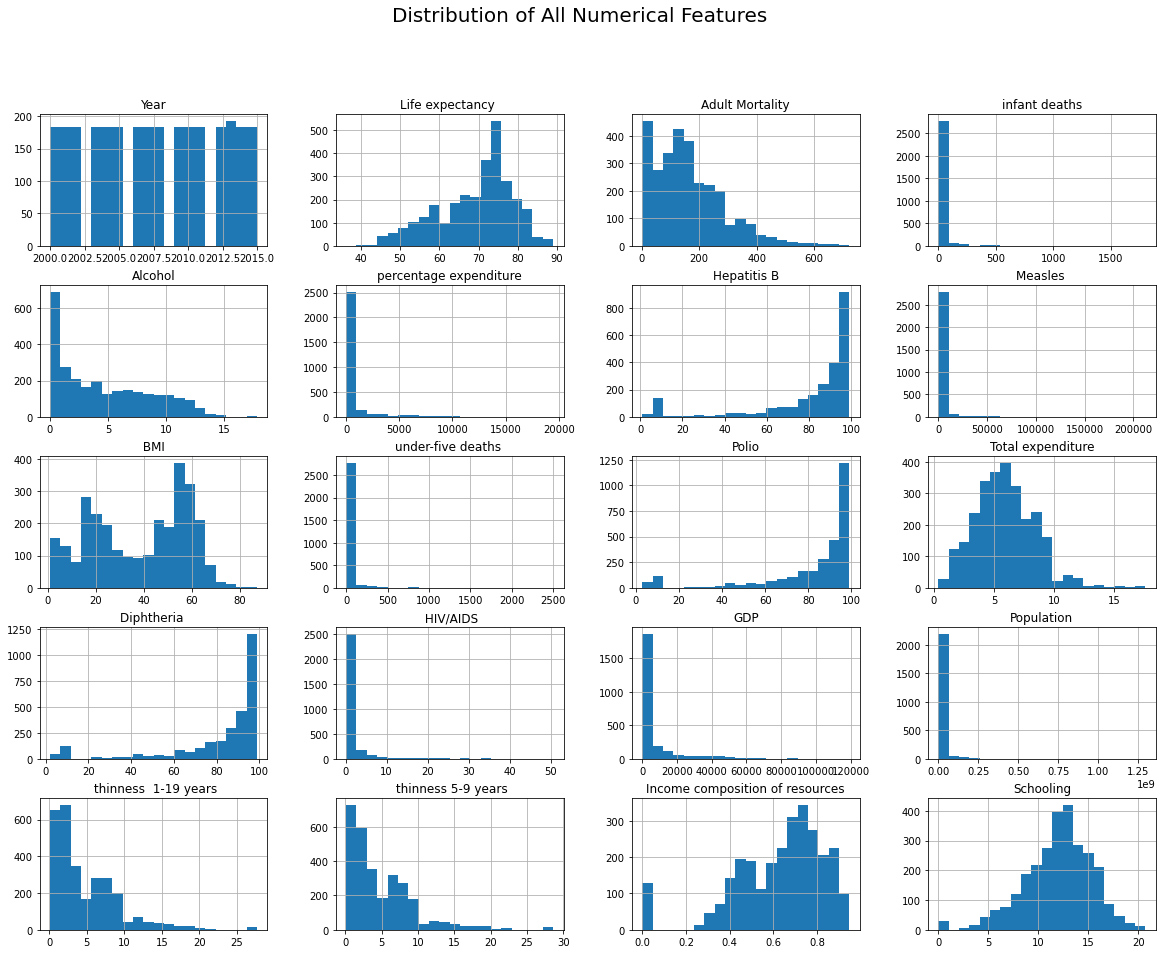

In [291]:
df.hist(bins=20, figsize=(20,15))
plt.suptitle("Distribution of All Numerical Features", size=20)
plt.show()

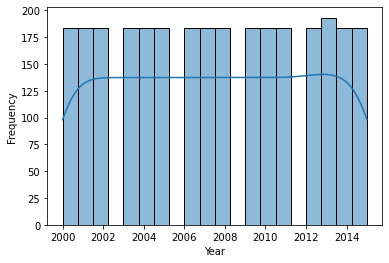

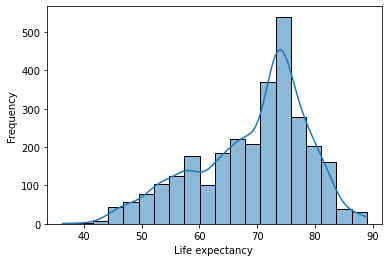

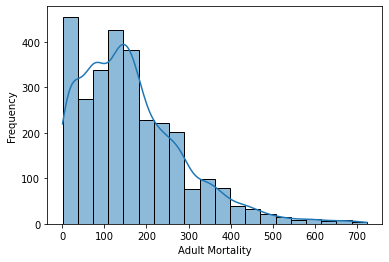

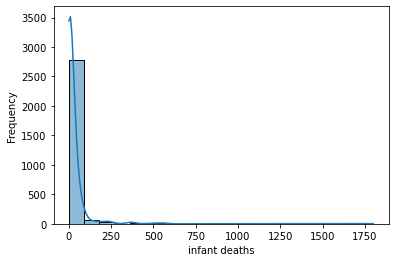

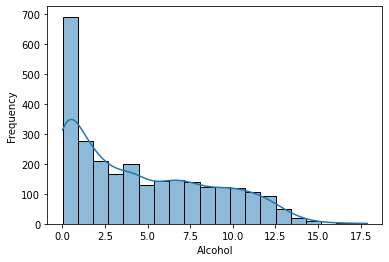

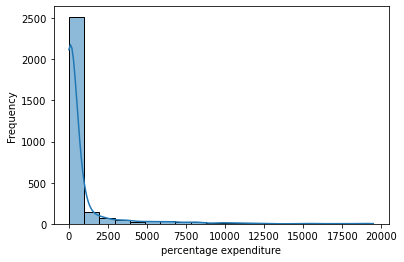

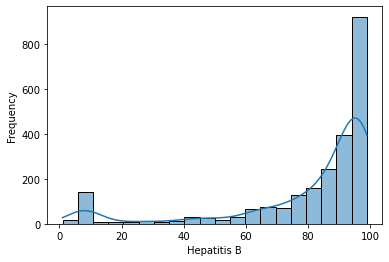

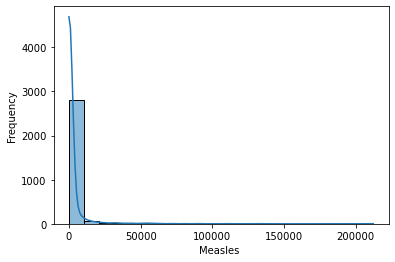

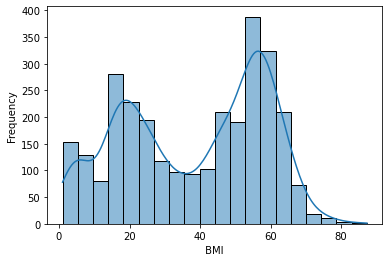

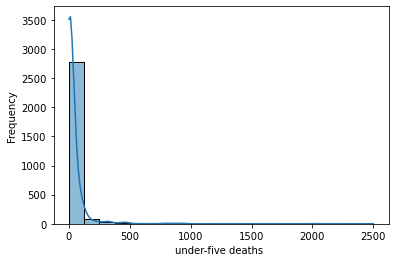

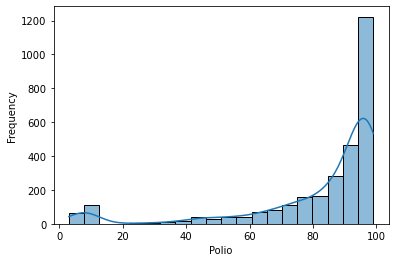

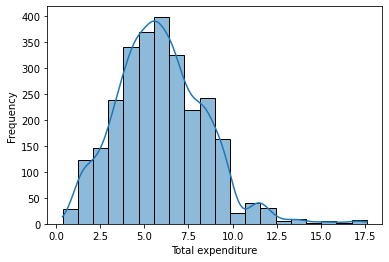

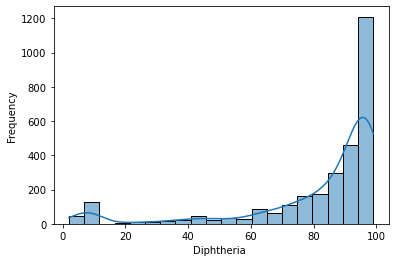

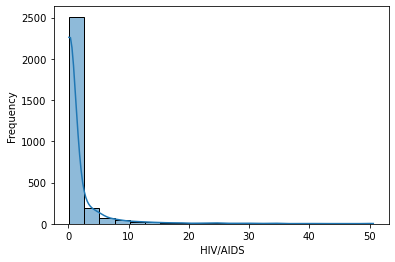

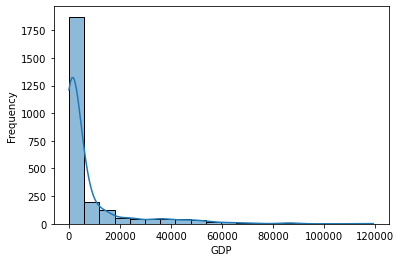

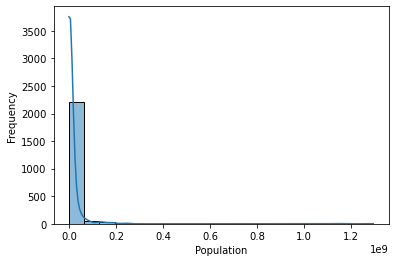

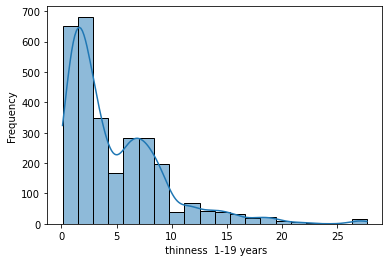

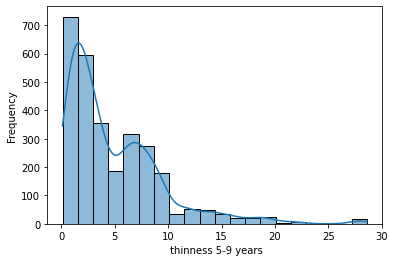

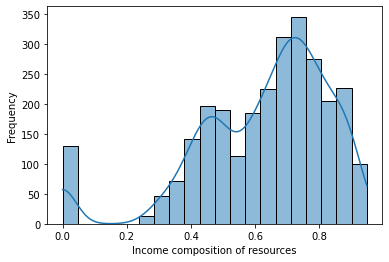

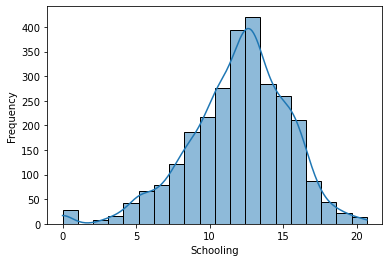

In [292]:
# 2. Distribution of Key Variables - Histograms
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x = i, kde=True, bins = 20)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


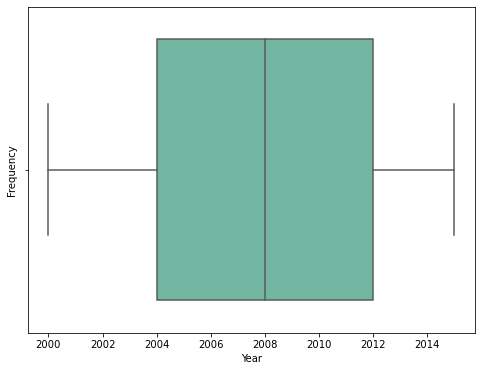

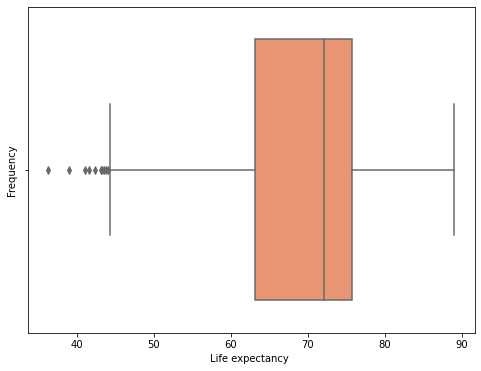

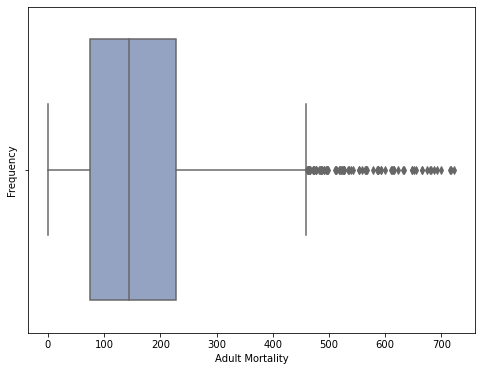

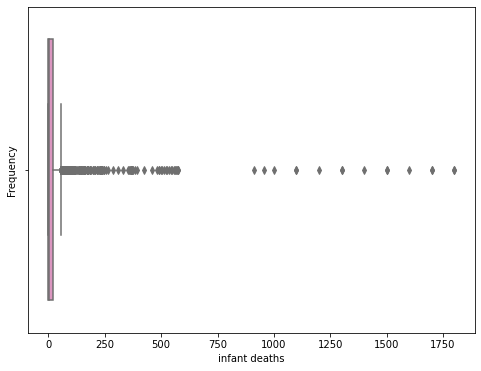

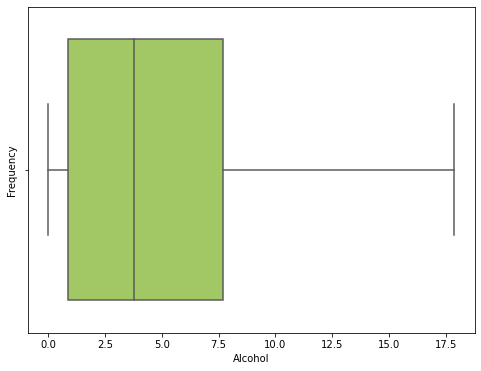

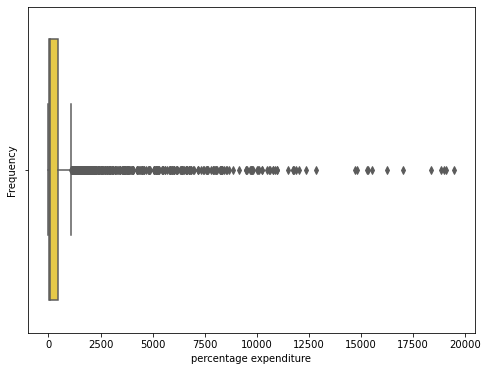

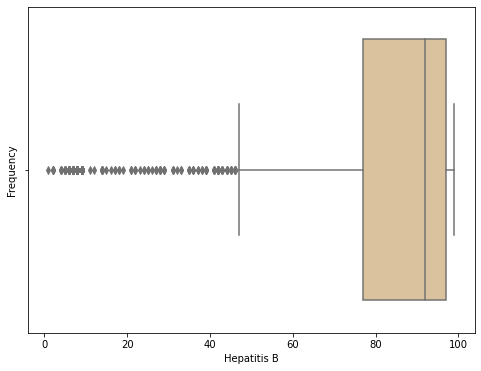

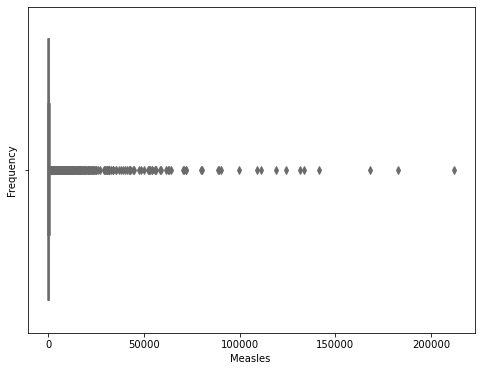

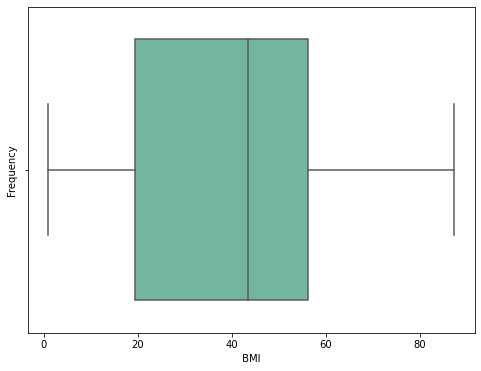

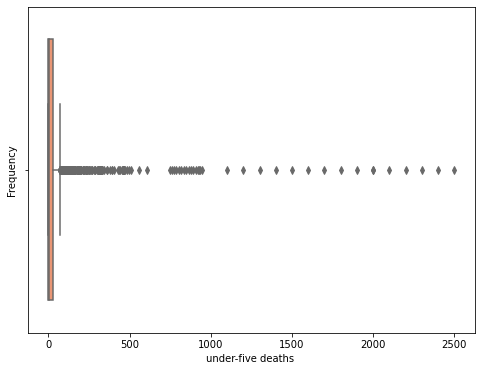

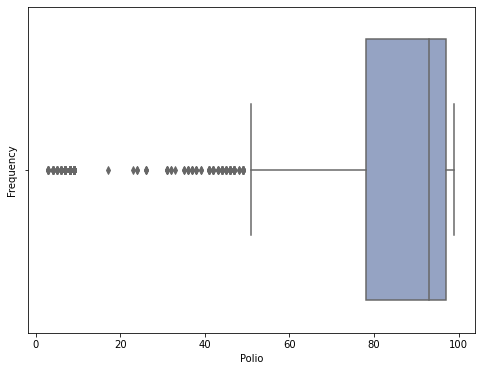

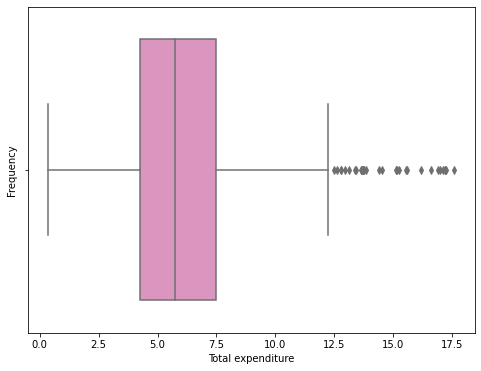

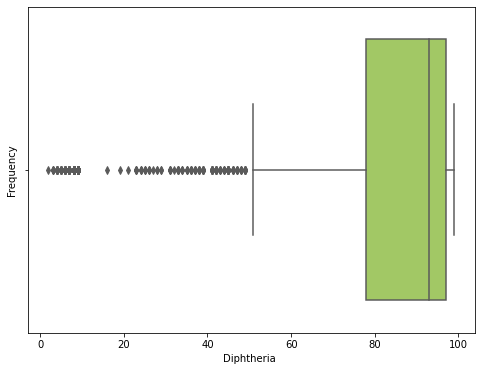

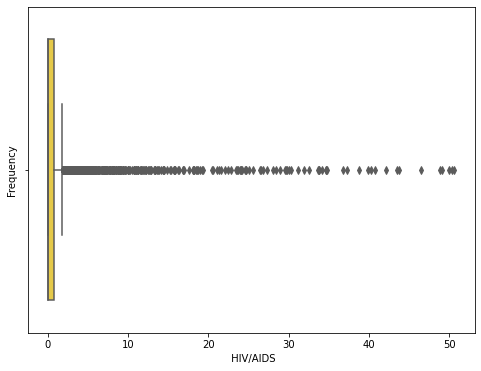

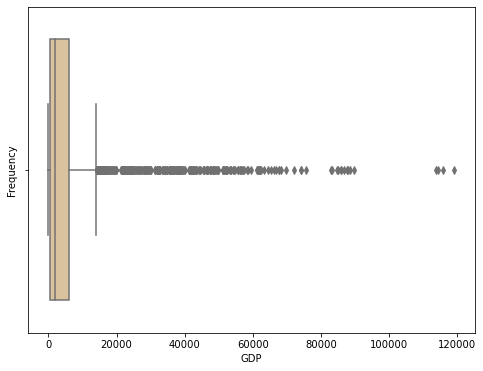

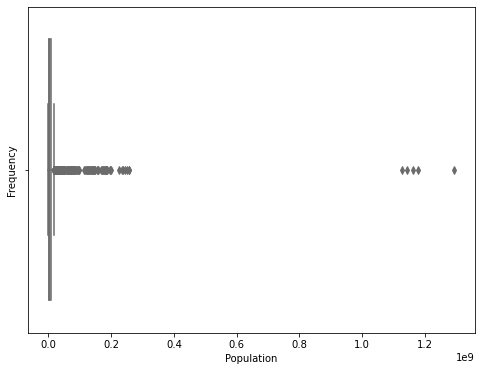

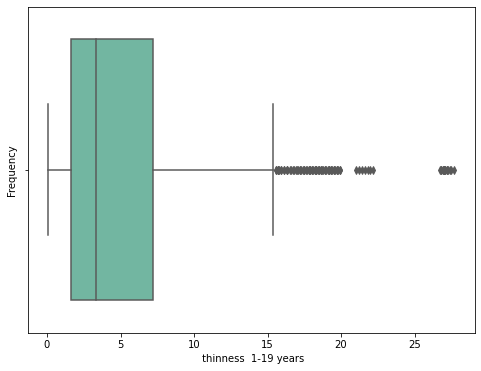

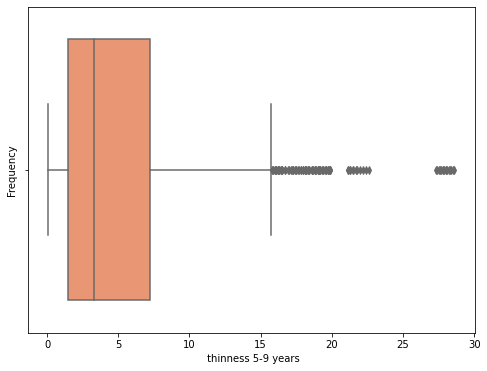

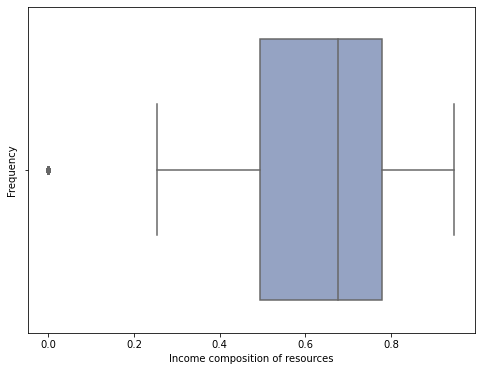

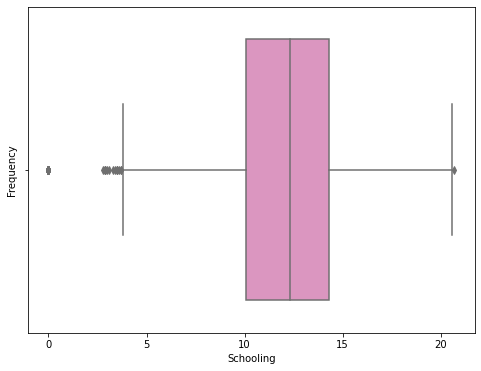

In [293]:
palette = sns.color_palette("Set2")
for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col, color=palette[i % len(palette)])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

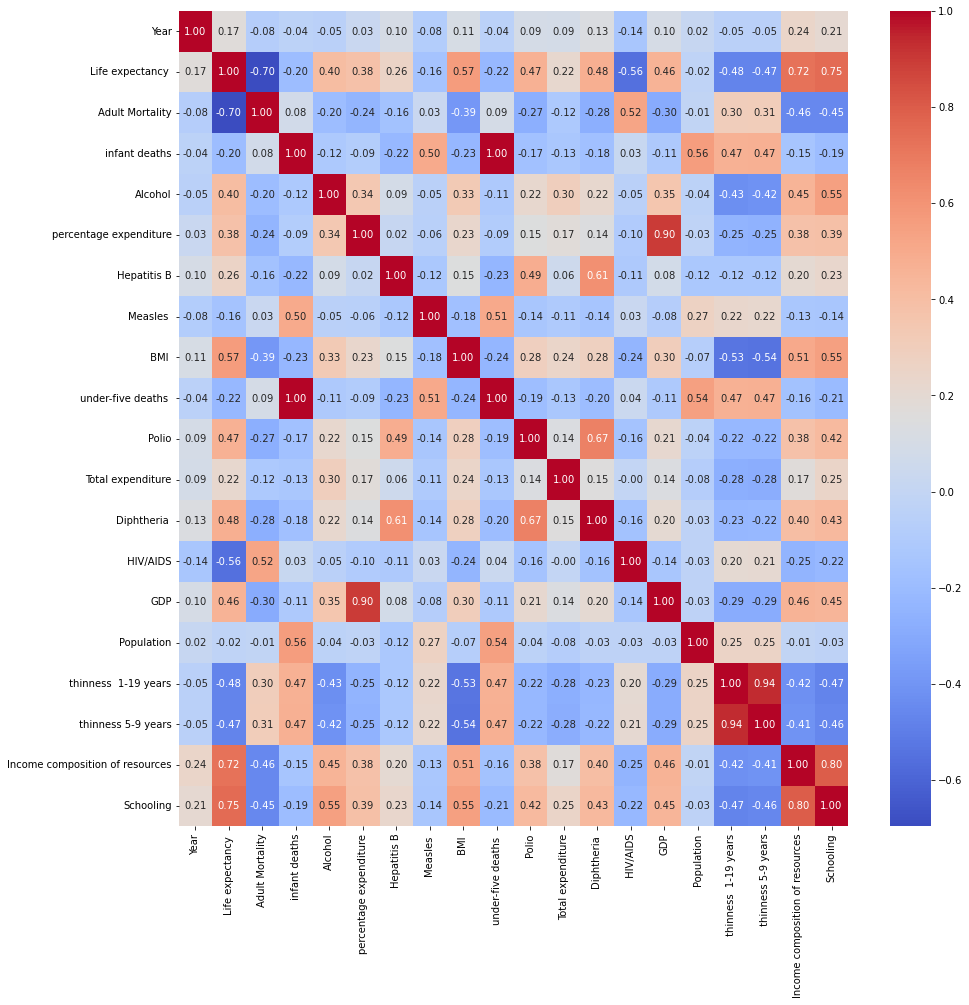

In [294]:
#correlation Matrix
corr_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

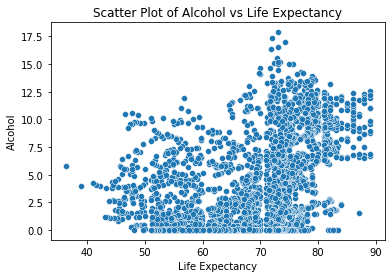

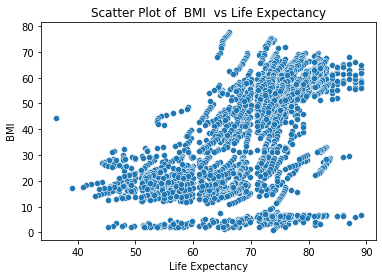

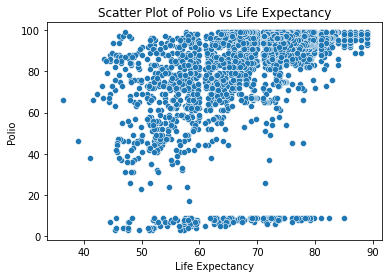

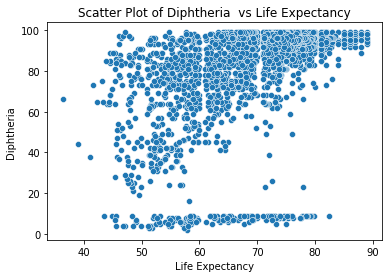

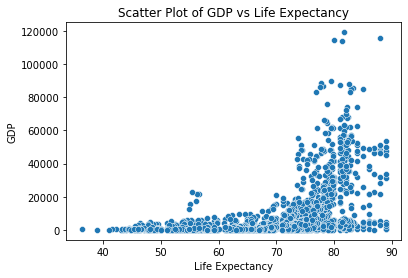

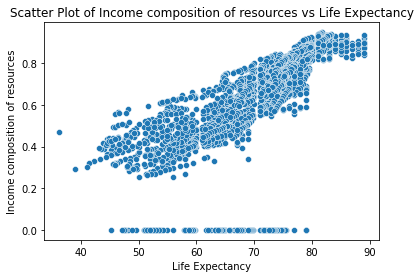

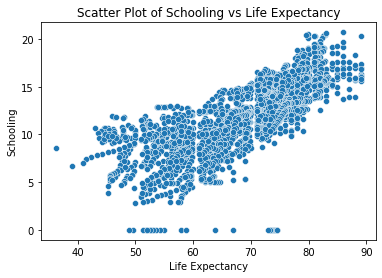

In [295]:
columns = ['Alcohol', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', 'Income composition of resources', 'Schooling']
for i in columns:
    sns.scatterplot(data=df, x='Life expectancy ', y=i)
    plt.title(f'Scatter Plot of {i} vs Life Expectancy')
    plt.xlabel('Life Expectancy')
    plt.ylabel(i)
    plt.show()  

In [296]:
#HANDLING NULL VALUES 

imp_feature = ['Alcohol', ' BMI ', 'Polio', 'Diphtheria ', 'GDP', 
                      'Income composition of resources', 'Schooling', 'Life expectancy ']

#Extract the important features
imp_df = df[imp_feature]


#standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(imp_df)

#Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_df = imputer.fit_transform(scaled_df)

# Update the DataFrame with the imputed data
df[imp_feature] = imputed_df



In [297]:
for i in  df.select_dtypes(include='number').columns:
    df[i].fillna(df[i].median(), inplace = True)

In [298]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [370]:
#Removing Outliners
def remove_outliers(df, columns,  threshold=2.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [371]:
columns = df.select_dtypes(include='number').columns


In [372]:
new_df = remove_outliers(df,columns, 2.5)

new_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
16,Albania,2015,Developing,0.900530,74.0,0,-0.000706,364.975229,99.0,0,...,0.702262,6.00,0.703244,0.1,-0.247344,28873.0,1.2,1.3,0.637605,0.657237
17,Albania,2014,Developing,0.869025,8.0,0,-0.022919,428.749067,98.0,0,...,0.659571,5.88,0.661073,0.1,-0.203780,288914.0,1.2,1.3,0.632863,0.657237
18,Albania,2013,Developing,0.837520,84.0,0,0.038784,430.876979,99.0,0,...,0.702262,5.66,0.703244,0.1,-0.215068,289592.0,1.3,1.4,0.623378,0.657237
19,Albania,2012,Developing,0.806015,86.0,0,0.132572,412.443356,99.0,9,...,0.702262,5.59,0.703244,0.1,-0.226780,2941.0,1.3,1.4,0.590182,0.657237
20,Albania,2011,Developing,0.774510,88.0,0,0.189339,437.062100,99.0,28,...,0.702262,5.71,0.703244,0.1,-0.213494,295195.0,1.4,1.5,0.523789,0.389245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,Venezuela (Bolivarian Republic of),2010,Developing,0.469960,158.0,9,0.645940,0.000000,78.0,0,...,-0.365018,5.40,-0.182352,0.1,-0.334170,1386542.0,1.6,1.5,0.599666,0.597683
2864,Venezuela (Bolivarian Republic of),2009,Developing,0.459458,166.0,9,0.737260,0.000000,84.0,0,...,-0.322327,5.81,0.070675,0.1,-0.379418,1386542.0,1.6,1.5,0.599666,0.597683
2867,Venezuela (Bolivarian Republic of),2006,Developing,0.459458,163.0,9,0.905092,0.000000,71.0,78,...,-0.407709,4.85,-0.477551,0.1,-0.171827,1386542.0,1.6,1.6,0.409972,0.121253
2869,Venezuela (Bolivarian Republic of),2004,Developing,0.427953,161.0,10,0.727388,0.000000,82.0,0,...,0.019203,4.78,0.155018,0.1,-0.017713,1386542.0,1.7,1.6,0.281928,-0.116961


In [373]:
#Encoading of data
categorical_columns = ['Country', 'Status']

# Step 2: Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [374]:
df_encoded.head(10)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015,-0.443691,263.0,62,-1.133571,71.279624,65.0,1154,-0.959116,83,...,0,0,0,0,0,0,0,0,0,1
1,2014,-0.979279,271.0,64,-1.133571,73.523582,62.0,492,-0.984066,86,...,0,0,0,0,0,0,0,0,0,1
2,2013,-0.979279,268.0,66,-1.133571,73.219243,64.0,430,-1.009015,89,...,0,0,0,0,0,0,0,0,0,1
3,2012,-1.021286,272.0,69,-1.133571,78.184215,67.0,2787,-1.033964,93,...,0,0,0,0,0,0,0,0,0,1
4,2011,-1.052791,275.0,71,-1.133571,7.097109,68.0,3013,-1.053924,97,...,0,0,0,0,0,0,0,0,0,1
5,2010,-1.094798,279.0,74,-1.133571,79.679367,66.0,1989,-1.078873,102,...,0,0,0,0,0,0,0,0,0,1
6,2009,-1.115802,281.0,77,-1.133571,56.762217,63.0,2861,-1.103823,106,...,0,0,0,0,0,0,0,0,0,1
7,2008,-1.168310,287.0,80,-1.128635,25.873925,64.0,1599,-1.128772,110,...,0,0,0,0,0,0,0,0,0,1
8,2007,-1.231321,295.0,82,-1.131103,10.910156,63.0,1141,-1.153721,113,...,0,0,0,0,0,0,0,0,0,1
9,2006,-1.252324,295.0,84,-1.128635,17.171518,64.0,1990,-1.178671,116,...,0,0,0,0,0,0,0,0,0,1
